In [5]:
import os
import networkx as nx
import pandas as pd

def ler_grafo_txt(caminho_arquivo):
    with open(caminho_arquivo, 'r') as f:
        # Lê a primeira linha que contém o número de vértices e o tamanho do conjunto de diversidade máxima
        primeira_linha = f.readline().strip()
        n_vertices, _ = map(int, primeira_linha.split())
        
        # Cria o grafo
        G = nx.Graph()
        
        # Adiciona as arestas ao grafo com pesos
        for linha in f:
            v1, v2, peso = map(float, linha.split())
            G.add_edge(int(v1), int(v2), weight=peso)
    
    return G

def calcular_caracteristicas_grafo(grafo):
    n_vertices = grafo.number_of_nodes()
    
    if n_vertices == 0:
        return {
            "n_vertices": 0,
            "n_arestas": 0,
            "peso_medio_arestas_por_vertice": None,
            "conexo": None,
            "n_componentes_conexas": None,
            "diametro": None,
            "excentricidade_media": None,
            "media_menores_caminhos": None,
            "raio": None,
            "densidade": None,
            "centralidade_media": None,
            "centralidade_max": None,
            "centralidade_min": None,
            "centralidade_proximidade_media": None,
            "centralidade_proximidade_max": None,
            "centralidade_proximidade_min": None,
            "centralidade_intermediacao_media": None,
            "centralidade_intermediacao_max": None,
            "centralidade_intermediacao_min": None,
            "coef_aglomeracao_media": None,
            "coef_aglomeracao_max": None,
            "coef_aglomeracao_min": None,
            "n_triangulos": None,
            "n_trios": None,
            "transitividade": None
        }
    
    n_arestas = grafo.number_of_edges()
    
    # Peso médio das arestas por vértice
    peso_total = sum([d['weight'] for u, v, d in grafo.edges(data=True)])
    peso_medio_arestas_por_vertice = peso_total / n_vertices if n_vertices > 0 else None
    
    conexo = nx.is_connected(grafo)
    n_componentes_conexas = nx.number_connected_components(grafo)
    diametro = nx.diameter(grafo) if conexo else None
    excentricidade_media = sum(nx.eccentricity(grafo).values()) / n_vertices if conexo else None
    media_menores_caminhos = nx.average_shortest_path_length(grafo) if conexo else None
    raio = nx.radius(grafo) if conexo else None
    densidade = nx.density(grafo)
    
    centralidade = nx.degree_centrality(grafo)
    centralidade_proximidade = nx.closeness_centrality(grafo)
    centralidade_intermediacao = nx.betweenness_centrality(grafo)
    
    centralidade_media = sum(centralidade.values()) / n_vertices
    centralidade_max = max(centralidade.values())
    centralidade_min = min(centralidade.values())
    
    centralidade_proximidade_media = sum(centralidade_proximidade.values()) / n_vertices
    centralidade_proximidade_max = max(centralidade_proximidade.values())
    centralidade_proximidade_min = min(centralidade_proximidade.values())
    
    centralidade_intermediacao_media = sum(centralidade_intermediacao.values()) / n_vertices
    centralidade_intermediacao_max = max(centralidade_intermediacao.values())
    centralidade_intermediacao_min = min(centralidade_intermediacao.values())
    
    coef_aglomeracao = nx.clustering(grafo)
    coef_aglomeracao_media = sum(coef_aglomeracao.values()) / n_vertices
    coef_aglomeracao_max = max(coef_aglomeracao.values())
    coef_aglomeracao_min = min(coef_aglomeracao.values())
    
    n_triangulos = sum(nx.triangles(grafo).values()) // 3
    n_trios = sum(nx.triangles(grafo).values()) // 2
    transitividade = nx.transitivity(grafo)
    
    return {
        "n_vertices": n_vertices,
        "n_arestas": n_arestas,
        "peso_medio_arestas_por_vertice": peso_medio_arestas_por_vertice,
        "conexo": conexo,
        "n_componentes_conexas": n_componentes_conexas,
        "diametro": diametro,
        "excentricidade_media": excentricidade_media,
        "media_menores_caminhos": media_menores_caminhos,
        "raio": raio,
        "densidade": densidade,
        "centralidade_media": centralidade_media,
        "centralidade_max": centralidade_max,
        "centralidade_min": centralidade_min,
        "centralidade_proximidade_media": centralidade_proximidade_media,
        "centralidade_proximidade_max": centralidade_proximidade_max,
        "centralidade_proximidade_min": centralidade_proximidade_min,
        "centralidade_intermediacao_media": centralidade_intermediacao_media,
        "centralidade_intermediacao_max": centralidade_intermediacao_max,
        "centralidade_intermediacao_min": centralidade_intermediacao_min,
        "coef_aglomeracao_media": coef_aglomeracao_media,
        "coef_aglomeracao_max": coef_aglomeracao_max,
        "coef_aglomeracao_min": coef_aglomeracao_min,
        "n_triangulos": n_triangulos,
        "n_trios": n_trios,
        "transitividade": transitividade
    }

def processar_arquivos(pasta):
    resultados = []
    
    for arquivo in os.listdir(pasta):
        if arquivo.endswith(".txt"):
            caminho_arquivo = os.path.join(pasta, arquivo)
            grafo = ler_grafo_txt(caminho_arquivo)
            
            caracteristicas = calcular_caracteristicas_grafo(grafo)
            caracteristicas["arquivo"] = arquivo
            resultados.append(caracteristicas)
    
    return pd.DataFrame(resultados)

# Exemplo de uso
pasta = "Instâncias Verificadas"
df_resultados = processar_arquivos(pasta)
df_resultados.to_csv("resultados_caracteristicas_grafos_txt.csv", index=False)


In [6]:
import pandas as pd

# Carregar o arquivo CSV combinado
df = pd.read_csv('resultados_caracteristicas_grafos_txt.csv')

In [7]:
# Obter estatísticas descritivas
print(df.describe())


        n_vertices     n_arestas  peso_medio_arestas_por_vertice  \
count   275.000000  2.750000e+02                      275.000000   
mean    314.090909  1.784895e+05                    11208.613801   
std     509.493891  5.133060e+05                    31963.174242   
min      10.000000  4.500000e+01                       52.520000   
25%      25.000000  3.000000e+02                      507.867379   
50%     100.000000  4.950000e+03                     1248.089760   
75%     500.000000  1.247500e+05                     4007.334572   
max    2000.000000  1.999000e+06                   125164.860700   

       n_componentes_conexas  diametro  excentricidade_media  \
count                  275.0     275.0                 275.0   
mean                     1.0       1.0                   1.0   
std                      0.0       0.0                   0.0   
min                      1.0       1.0                   1.0   
25%                      1.0       1.0                   1.0   
50%

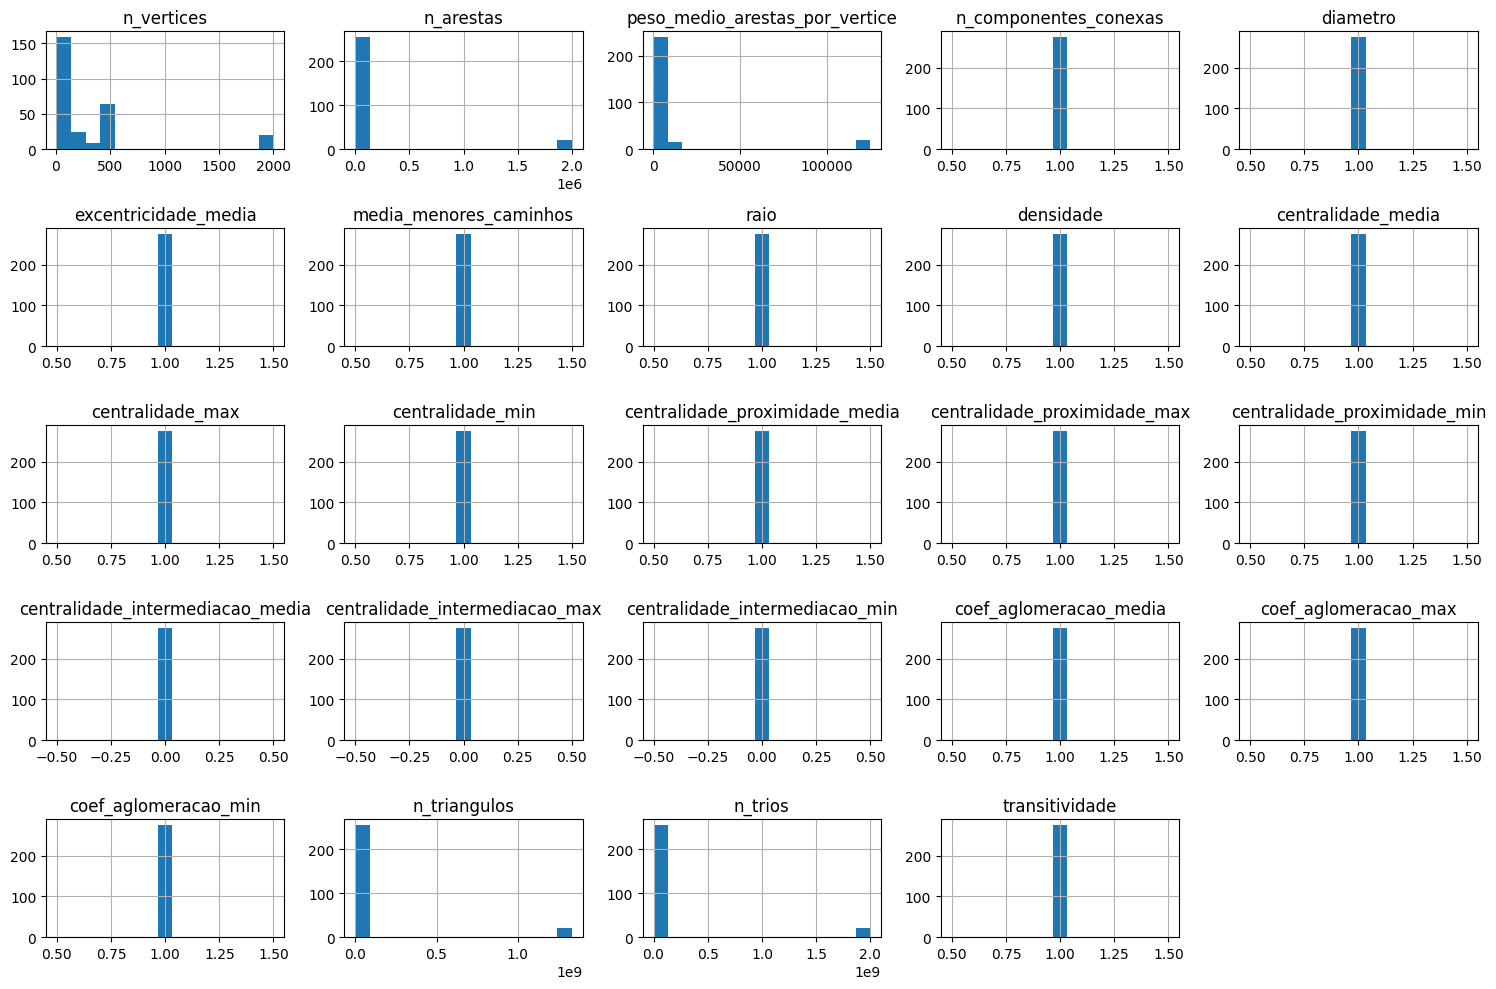

In [8]:
import matplotlib.pyplot as plt

# Criar histogramas para cada característica numérica
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


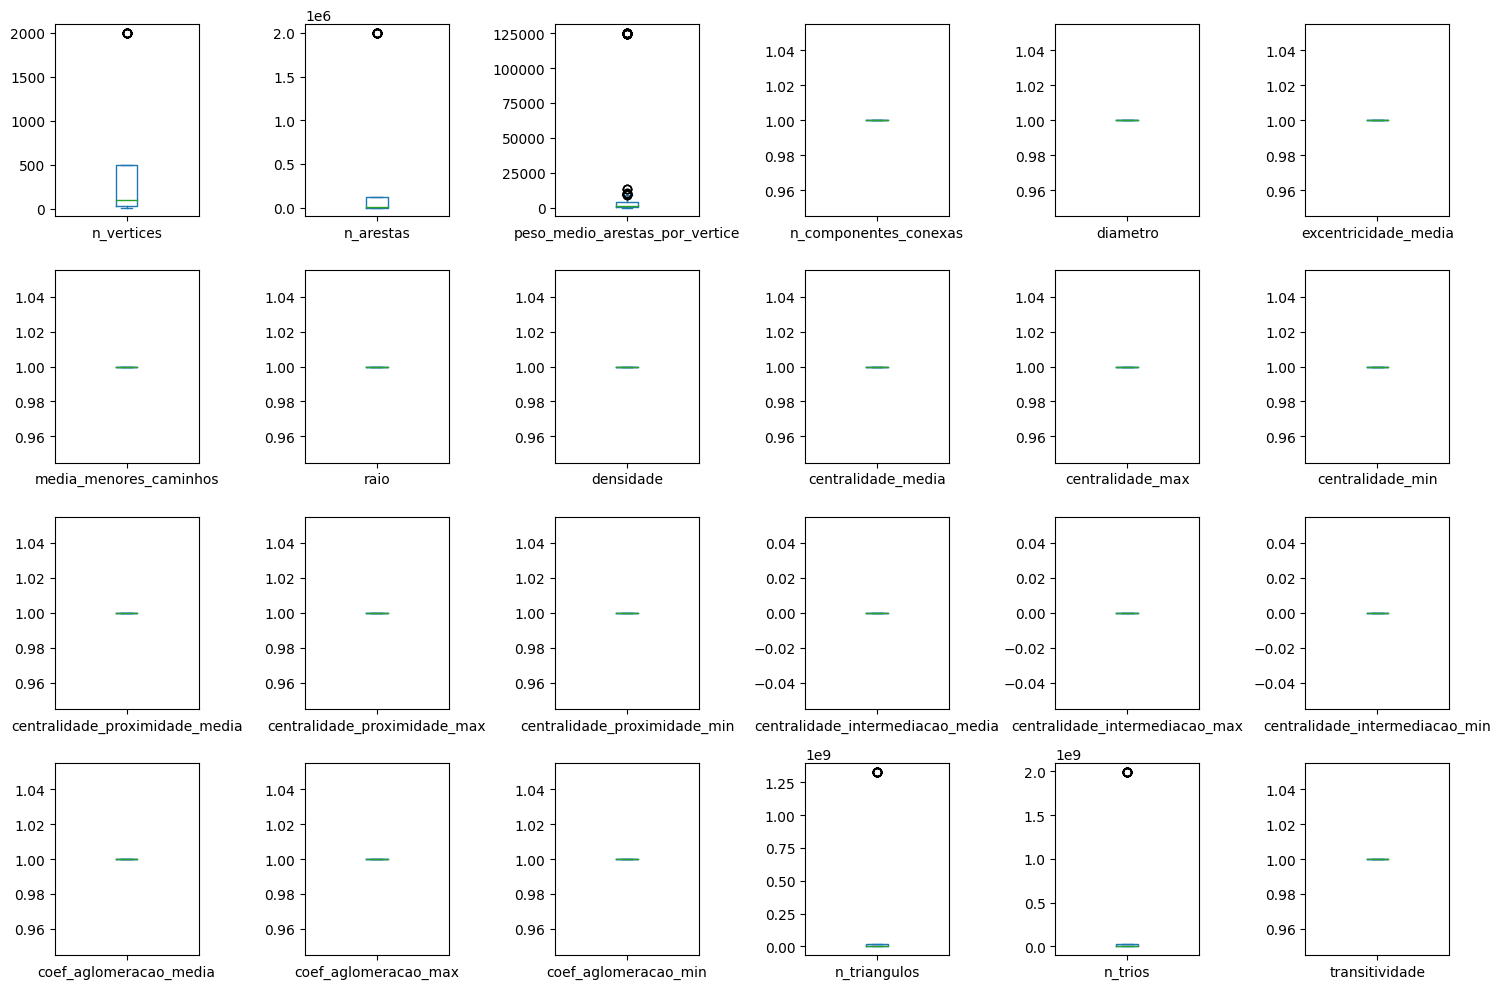

In [9]:
# Criar boxplots para cada característica
df.plot(kind='box', subplots=True, layout=(4,6), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [11]:
# Verificar se há colunas com valores nulos ou constantes
print(df.isnull().sum())  # Verifica o número de valores nulos em cada coluna
print(df.nunique())       # Verifica o número de valores únicos em cada coluna


n_vertices                          0
n_arestas                           0
peso_medio_arestas_por_vertice      0
conexo                              0
n_componentes_conexas               0
diametro                            0
excentricidade_media                0
media_menores_caminhos              0
raio                                0
densidade                           0
centralidade_media                  0
centralidade_max                    0
centralidade_min                    0
centralidade_proximidade_media      0
centralidade_proximidade_max        0
centralidade_proximidade_min        0
centralidade_intermediacao_media    0
centralidade_intermediacao_max      0
centralidade_intermediacao_min      0
coef_aglomeracao_media              0
coef_aglomeracao_max                0
coef_aglomeracao_min                0
n_triangulos                        0
n_trios                             0
transitividade                      0
arquivo                             0
dtype: int64

In [13]:
# Remover colunas que têm muitos valores NaN (por exemplo, mais de 50% dos valores são NaN)
df_clean = df.dropna(axis=1, thresh=int(0.5 * len(df)))

# Verificar as colunas restantes
print(df_clean.columns)


Index(['n_vertices', 'n_arestas', 'peso_medio_arestas_por_vertice', 'conexo',
       'n_componentes_conexas', 'diametro', 'excentricidade_media',
       'media_menores_caminhos', 'raio', 'densidade', 'centralidade_media',
       'centralidade_max', 'centralidade_min',
       'centralidade_proximidade_media', 'centralidade_proximidade_max',
       'centralidade_proximidade_min', 'centralidade_intermediacao_media',
       'centralidade_intermediacao_max', 'centralidade_intermediacao_min',
       'coef_aglomeracao_media', 'coef_aglomeracao_max',
       'coef_aglomeracao_min', 'n_triangulos', 'n_trios', 'transitividade',
       'arquivo'],
      dtype='object')


In [14]:
# Remover colunas que têm o mesmo valor em todas as linhas
df_clean = df_clean.loc[:, df_clean.nunique() > 1]

# Verificar as colunas restantes
print(df_clean.columns)


Index(['n_vertices', 'n_arestas', 'peso_medio_arestas_por_vertice',
       'n_triangulos', 'n_trios', 'arquivo'],
      dtype='object')


                                n_vertices  n_arestas  \
n_vertices                        1.000000   0.960098   
n_arestas                         0.960098   1.000000   
peso_medio_arestas_por_vertice    0.126592  -0.005520   
n_triangulos                      0.937073   0.997220   
n_trios                           0.937073   0.997220   

                                peso_medio_arestas_por_vertice  n_triangulos  \
n_vertices                                            0.126592      0.937073   
n_arestas                                            -0.005520      0.997220   
peso_medio_arestas_por_vertice                        1.000000     -0.042180   
n_triangulos                                         -0.042180      1.000000   
n_trios                                              -0.042180      1.000000   

                                 n_trios  
n_vertices                      0.937073  
n_arestas                       0.997220  
peso_medio_arestas_por_vertice -0.042180  
n_tr

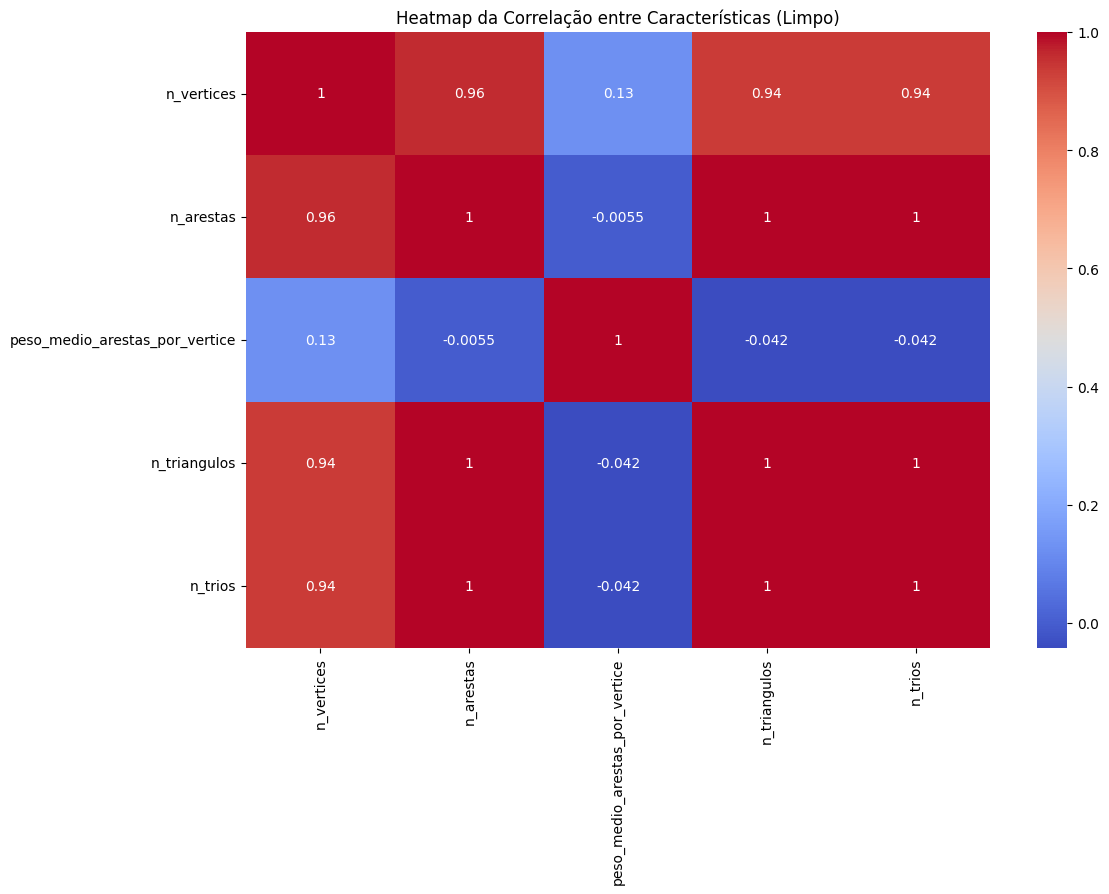

In [18]:
# Calcular a nova matriz de correlação
correlation_matrix_clean = df_clean.drop(columns=['arquivo']).corr()

# Exibir a nova matriz de correlação
print(correlation_matrix_clean)

# Criar um heatmap da nova matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_clean, annot=True, cmap='coolwarm')
plt.title("Heatmap da Correlação entre Características (Limpo)")
plt.show()
